# Titanic Exploratory Data Analysis (EDA)

## Objective
Perform a detailed exploratory data analysis on the Titanic dataset to understand the factors that influenced survival and prepare the data for potential modeling.

### Tasks:
1. **Handle Missing Values**: Identify and impute or remove missing data.
2. **Feature Engineering**: Create new features to enhance model performance.
3. **Visualizations**: Use histograms, boxplots, and heatmaps for insights.
4. **Key Insights**: Summarize the findings from the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load the Dataset

In [3]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Basic Data Overview

In [4]:
df.info()
print("\nMissing values count:\n", df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB

Missing values count:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: 

## 3. Handling Missing Values

We have missing values in `Age`, `Cabin`, and `Embarked`.

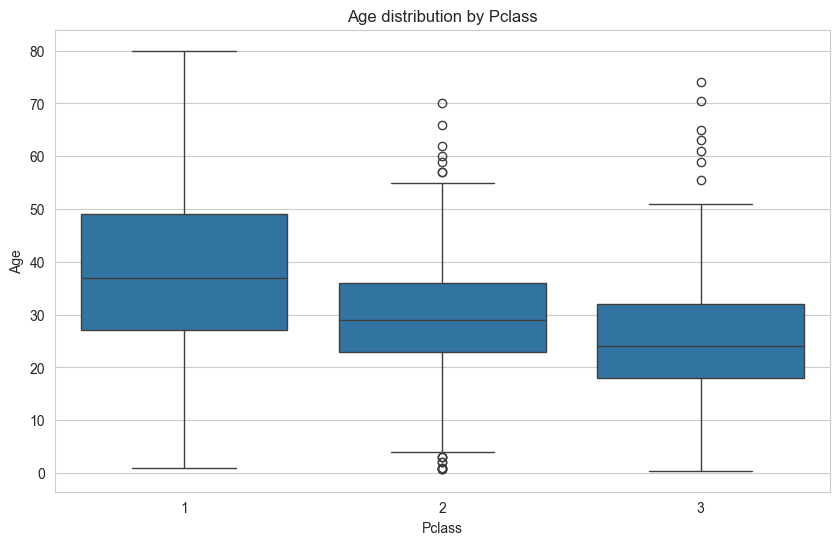

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
# Impute Age with median based on Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution by Pclass')
plt.show()

def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else: return Age

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# Embarked: dropping the 2 rows with missing values
df.dropna(subset=['Embarked'], inplace=True)

# Cabin: too many missing values, we'll drop it or create a 'HasCabin' feature
df.drop('Cabin', axis=1, inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())

## 4. Feature Engineering

Create family size and extract titles from names.

In [6]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is Alone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extract Title
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr


## 5. Visualizations

### Survival by Gender

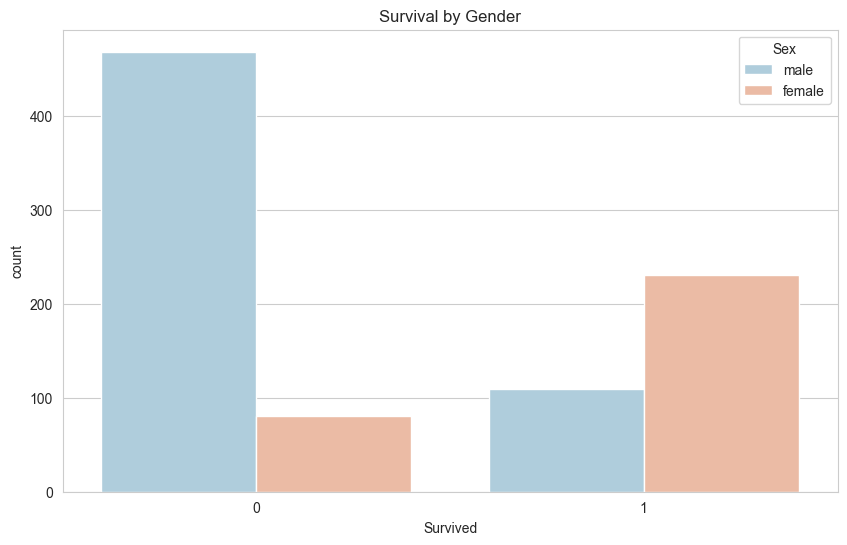

In [7]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
plt.title('Survival by Gender')
plt.show()

### Age Distribution

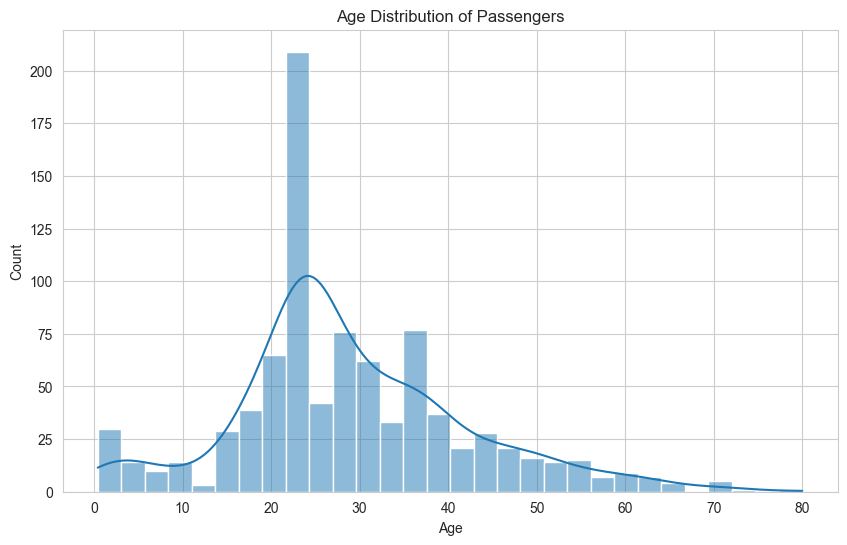

In [8]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

### Correlation Heatmap

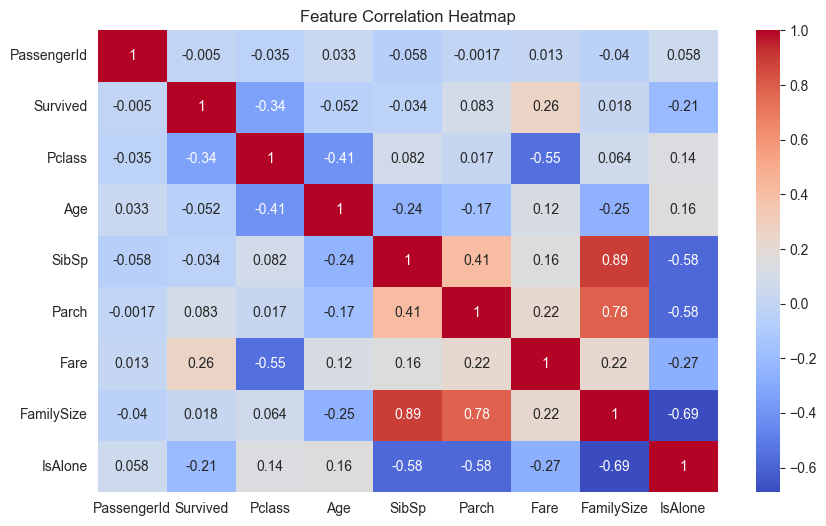

In [9]:
# Filter for numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 6. Key Insights

1. **Gender**: Females had a significantly higher survival rate than males.
2. **Class**: Passengers in 1st class were more likely to survive.
3. **Age**: Children had a better survival rate than middle-aged adults.
4. **Family Size**: Being alone or having a large family decreased survival chances compared to small families.

## 7. Model Comparison (Brief Preparation)

We will perform a quick training of two models to generate comparison data.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encoding categorical variables
df_final = pd.get_dummies(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']], drop_first=True)

X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Logistic Regression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
log_preds = logmodel.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

# Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_preds)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rfc_acc:.4f}")

Logistic Regression Accuracy: 0.8539
Random Forest Accuracy: 0.8240
